<a href="https://colab.research.google.com/github/alvarosamp/ML_TO_GEOSCIENCE/blob/main/SerieEstacion%C3%A1riaxSerieNaoEstacion%C3%A1ria_(_aula_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stationary vs Non-stationary Time Series

Um aspectoo critico para a analise de seris temporais é entender uma série estacionaria, alguns metodos estatistico necessita de uma serie estacionaria. A serie nao estacionaria pode trazer resultados imprecisos, enquanto a serie estacionária pode ajudar a a simplificar analises complexas e ajudar na interpretação da série.

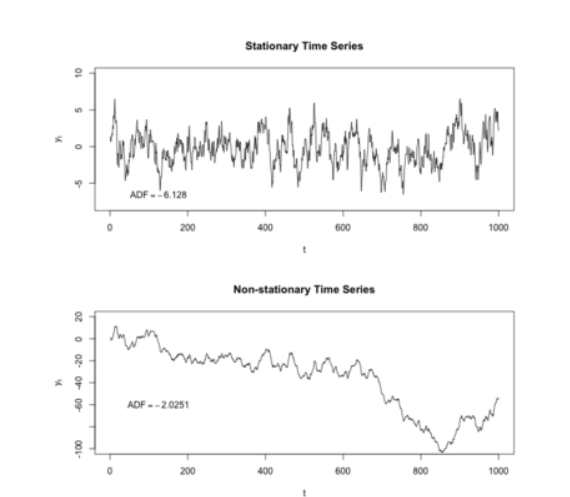

Uma serie estacionária é um tipo de serie cujo suas propriedades estatistica que nao muda de acordo com o tempo. Isso significa que o comportamento estatistico permance constante, independente de quantas informações foram recordadas.

Intuitivamente, isso significa que, se tirássemos um instantâneo da série temporal em qualquer ponto no tempo, as propriedades estatísticas desse instantâneo seriam semelhantes às de qualquer outro instantâneo obtido em um ponto diferente no tempo. Por exemplo, a média e a variância da série temporal seriam idênticas, e a correlação entre as observações dependeria apenas da diferença de tempo entre elas, não do tempo absoluto em que foram registradas.

Tecnicamente, uma série temporal estacionária é definida como um processo estocástico cuja distribuição conjunta é invariante ao deslocamento. Isso significa que a distribuição conjunta do processo permanece a mesma, independentemente de quanto deslocamos o eixo do tempo. Em outras palavras, as propriedades estatísticas do processo não mudam ao longo do tempo.

Podemos procurar características específicas nos dados para determinar se uma série temporal é estacionária ou não estacionária. Por exemplo, uma série temporal estacionária terá média, variância e autocorrelação constantes ao longo do tempo. Por outro lado, séries temporais não estacionárias podem apresentar tendências, sazonalidade ou variação de variância.

## Como checar estacionariedade ?

Nos temos 2 testes para testar qual tipo é a série.

* Intuitive approach: De forma visual
* Abordagem estatistica : Testes unitários

### Intuitive approach

Voce pode visualizar a 'estacionariadade' de uma série  de forma mental dividindo o tempo em periodos e comparando a média, amplitude o comprimento do ciclo da primeira parte para a segunda


-> Média constante : O valor da media do primeiro periodo deveria ser similar o do segundo periodo

-> Variancia constante : A ampltude do primeiro quadro é igual a do segundo

-> Covariancia de tempo independente : quando as ondas tem um periodo difrente,
primeiro ciclo diferente do segundo ciclo

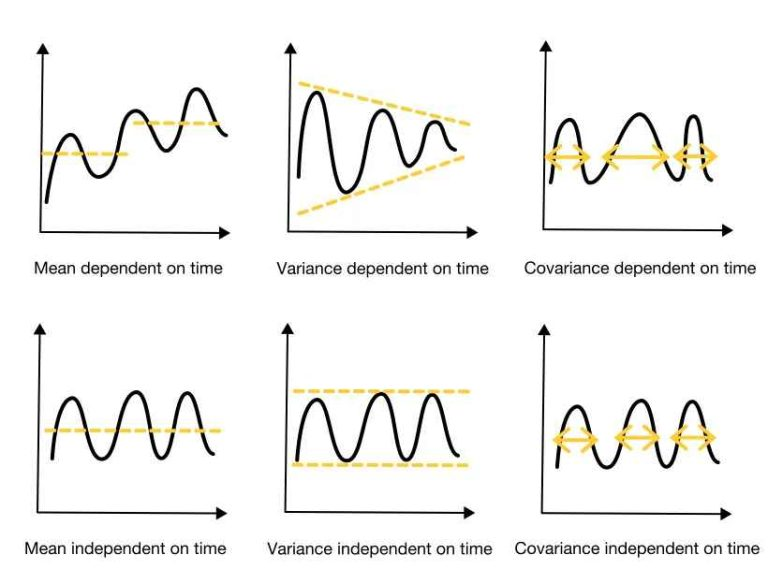

## Statistical approach

A unit root is a stochastic trend, i.e. a random walk with drift. Since random behavior cannot be predicted, this means:

- Presence of unit root: non-stationary (unpredictable);
- Absence of unit root: stationary.

To test stationarity, it is necessary to use a unit root test, and therefore, it is necessary to create competing hypotheses:

- Null hypothesis (H0) - for example, the time series is stationary (no unit root present);
- Alternative hypothesis (H1) - for example, the time series is not stationary (unit root present).

You will assess whether to reject or fail to reject the null hypothesis based on two approaches:

- P-value: If the p-value > 0.05, fail to reject the null hypothesis. If the p-value ≤ 0.05, reject the null hypothesis;
- Critical value: If the test statistic is less than the critical value, fail to reject the null hypothesis. If the test statistic is greater than the critical value, reject the null hypothesis. The critical value approach should be used when the p-value is close to being significant (e.g. around 0.05).

There are several unit root tests that you can use to check for stationarity.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Geoscience/Alvaro/Aula6/Global Temperature.csv')

In [ ]:
df.head()

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc,Five-Year Anomaly,Five-Year Unc.,Ten-Year Anomaly,Ten-Year Unc.,Twenty-Year Anomaly,Twenty-year Unc.
0,1850,1,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.119,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.485,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.351,0.549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head(13)

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc,Five-Year Anomaly,Five-Year Unc.,Ten-Year Anomaly,Ten-Year Unc.,Twenty-Year Anomaly,Twenty-year Unc.
0,1850,1,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.119,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.485,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.351,0.549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1850,6,-0.528,0.448,-0.326,0.189,NaN,NaN,NaN,NaN,NaN,NaN
6,1850,7,0.036,0.457,-0.27,0.186,NaN,NaN,NaN,NaN,NaN,NaN
7,1850,8,-0.276,0.369,-0.283,0.143,NaN,NaN,NaN,NaN,NaN,NaN
8,1850,9,-0.328,0.33,-0.301,0.155,NaN,NaN,NaN,NaN,NaN,NaN
9,1850,10,-0.325,0.623,-0.296,0.148,NaN,NaN,NaN,NaN,NaN,NaN


Entendendo o dataset

Esse dataset indica a temperatura global classificada por meses e anos.

Colunas
**Year :** O ano em que ocorreu

**Month :** O mes em que ocorreu

**Monthly Anomaly :** A anomlaia de temperatura mensal em relação a um periodo de inferencia

**Monthly Unc :** A incerteza associada a  anomlaia de temperaturas mensal

**Annual Anomaly :** A anaomalia de temperatura anual em relação a um periodo de referencia.( Essa coluna tem varios valores Nan, indicando que a anomlia anual não esta disponivel para todas as linhas, provavelmente so para os meses de cada ano ou agregada em outra granularidade)

**Annual UNC :** A incerteza associada a anomalia de temperatura anual (tambem com muitos valores nan)

**Five-year annomaly :** A anomalia de temperatura em uma janela de cinco anos

**Ten-Year Anomaly:** A anomalia de temperatura em uma janela de dez anos. (Com muitos valores NaN).

**Ten-Year Unc.:** A incerteza associada à anomalia de temperatura em uma janela de dez anos. (Com muitos valores NaN).

**Twenty-Year Anomaly:** A anomalia de temperatura em uma janela de vinte anos. (Com muitos valores NaN).

**Twenty-year Unc.:** A incerteza associada à anomalia de temperatura em uma janela de vinte anos. (Com muitos valores NaN).





In [ ]:
df.columns

Index(['Year', ' Month', 'Monthly Anomaly', ' Monthly Unc.',
       '  Annual Anomaly', ' Annual Unc', 'Five-Year Anomaly',
       ' Five-Year Unc.', ' Ten-Year Anomaly', ' Ten-Year Unc.',
       '  Twenty-Year Anomaly', ' Twenty-year Unc.'],
      dtype='object')

In [ ]:
df.columns = [col.replace(' ', '') for col in df.columns]
display(df.columns)

Index(['Year', 'Month', 'MonthlyAnomaly', 'MonthlyUnc.', 'AnnualAnomaly',
       'AnnualUnc', 'Five-YearAnomaly', 'Five-YearUnc.', 'Ten-YearAnomaly',
       'Ten-YearUnc.', 'Twenty-YearAnomaly', 'Twenty-yearUnc.'],
      dtype='object')

In [ ]:
#vamos gerar uma coluna date e colocar ela como indice da tabela
df['Date'] = pd.to_datetime(df.Year.astype(str) + '/' + df.Month.astype(str) + '/01')

In [ ]:
df

,Year,Month,MonthlyAnomaly,MonthlyUnc.,AnnualAnomaly,AnnualUnc,Five-YearAnomaly,Five-YearUnc.,Ten-YearAnomaly,Ten-YearUnc.,Twenty-YearAnomaly,Twenty-yearUnc.,Date
0,1850,1,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850-01-01
1,1850,2,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850-02-01
2,1850,3,-0.119,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850-03-01
3,1850,4,-0.485,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850-04-01
4,1850,5,-0.351,0.549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,2022,9,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01
2073,2022,10,1.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-01
2074,2022,11,0.626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-01
2075,2022,12,0.923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-01


In [ ]:
df = df.drop(['Year','Month'], axis=1)

In [ ]:
df

,MonthlyAnomaly,MonthlyUnc.,AnnualAnomaly,AnnualUnc,Five-YearAnomaly,Five-YearUnc.,Ten-YearAnomaly,Ten-YearUnc.,Twenty-YearAnomaly,Twenty-yearUnc.,Date
0,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850-01-01
1,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850-02-01
2,-0.119,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850-03-01
3,-0.485,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850-04-01
4,-0.351,0.549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850-05-01
...,...,...,...,...,...,...,...,...,...,...,...
2072,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01
2073,1.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-01
2074,0.626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-01
2075,0.923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-01


In [ ]:
df = df.set_index('Date')
display(df.head())

,MonthlyAnomaly,MonthlyUnc.,AnnualAnomaly,AnnualUnc,Five-YearAnomaly,Five-YearUnc.,Ten-YearAnomaly,Ten-YearUnc.,Twenty-YearAnomaly,Twenty-yearUnc.
Date,,,,,,,,,,
1850-01-01,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-02-01,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-03-01,-0.119,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-04-01,-0.485,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-05-01,-0.351,0.549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt


## Augument Dickey-Fuller Test

The ADF test is used to determine the presence of a unit root in a series, and therefore, to verify whether the series is stationary or not.

In the test, the null hypothesis and the alternative hypothesis are:

- Null Hypothesis: the series contains a unit root
- Alternative Hypothesis: the series does not contain a unit root
If we do not reject the null hypothesis, the test shows that the series is not stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(df['MonthlyAnomaly'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.350073
p-value                           0.605964
#Lags Used                       23.000000
Number of Observations Used    2053.000000
Critical Value (1%)              -3.433539
Critical Value (5%)              -2.862949
Critical Value (10%)             -2.567520
dtype: float64


The statsmodels package provides a reliable implementation of the ADF test through the adfuller() function in statsmodels.tsa.stattools. It returns the following outputs:

- The p-value
- The value of the test statistic
- The number of lags considered for the test
- The critical value cutoffs.

When the test statistic is less than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.

As seen previously, the null hypothesis of the test is the presence of a unit root; that is, the series is not stationary.

ADF tests provide the following results – test statistic, p-value, and critical value at 1%, 5%, and 10% confidence intervals.



The test statistic is -1.350073, which is greater than either of the critical values.

The ADF statistic is greater than either of the critical values. Clearly, there is no reason to reject the null hypothesis. Therefore, the time series is indeed non-stationary.


## Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”)

KPSS is another test to check if the series is stationary. The KPSS hypotheses are the opposite of ADF, that is:

- Null Hypothesis: the series does not contain a unit root
- Alternative Hypothesis: the series contains a unit root
If we do not reject the alternative hypothesis, the test shows that the series is not stationary.

The KPSS test output contains 4 things:

- The KPSS statistic
- p-value
- Number of lags used by the test
- Critical values

The p-value reported by the test is the probability score based on which you can decide whether or not to reject the null hypothesis. If the p-value is less than a predefined alpha level (typically 0.05), then we reject the null hypothesis.

The KPSS statistic is the actual test statistic that is computed during the test run.

To reject the null hypothesis, the test statistic must be greater than the given critical values. If it is, in fact, greater than the target critical value, then this should automatically reflect in a low p-value. That is, if the p-value is less than 0.05, then the kpss statistic will be greater than the 5% critical value.

### Combining Results

It is always suggested to apply both tests to the series, so that it can be confirmed with complete certainty that the series are really stationary. There are also possible test results:

- Case 1: Both tests conclude that the series is not stationary - The series is not stationary
- Case 2: Both tests conclude that the series is stationary - The series is stationary
- Case 3: KPSS indicates stationarity, and ADF indicates non-stationarity. The series has a stationary trend, therefore, it is necessary to remove the trend so that the series is strictly stationary. Check whether the new series is stationary.
- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity. The series is stationary in the difference, that is, it is necessary to differentiate the series so that it is stationary. Check whether the new series is stationary.

### Differening

The process of calculating the differences between successive observations in a given time series is known as differencing. Higher-order differences can be obtained by further differencing the resulting series, which is called first differencing.

The main purpose of differencing is to remove non-constant variations and trends from a time series, while stabilizing the mean. When working with non-stationary data — where the statistical characteristics of the series fluctuate over time.

Differences are used in time series analysis to adjust the mean and remove trends or time lags in data. The idea is to calculate the difference between a series of observations at time intervals, resulting in a new series of data points that represent changes from one period to another rather than absolute values. Differences are useful when dealing with non-stationary time series data, where the mean, variance, or other statistical characteristics change over time. Observing and analyzing non-stationary data can be more complicated, and differencing is a common method of converting this information into a stable form. Each value in the time series is subtracted from the previous value in first-order differencing.

As a result, a new series is created that symbolizes the transition from one era to the next. Subtracting the second-lag value from the present value is the higher-order differencing process, and so on.

In [ ]:
diff_data = df['MonthlyAnomaly'].diff()
diff_data

,MonthlyAnomaly
Date,
1850-01-01,NaN
1850-02-01,0.699
1850-03-01,-0.017
1850-04-01,-0.366
1850-05-01,0.134
...,...
2022-09-01,-0.068
2022-10-01,0.155
2022-11-01,-0.500


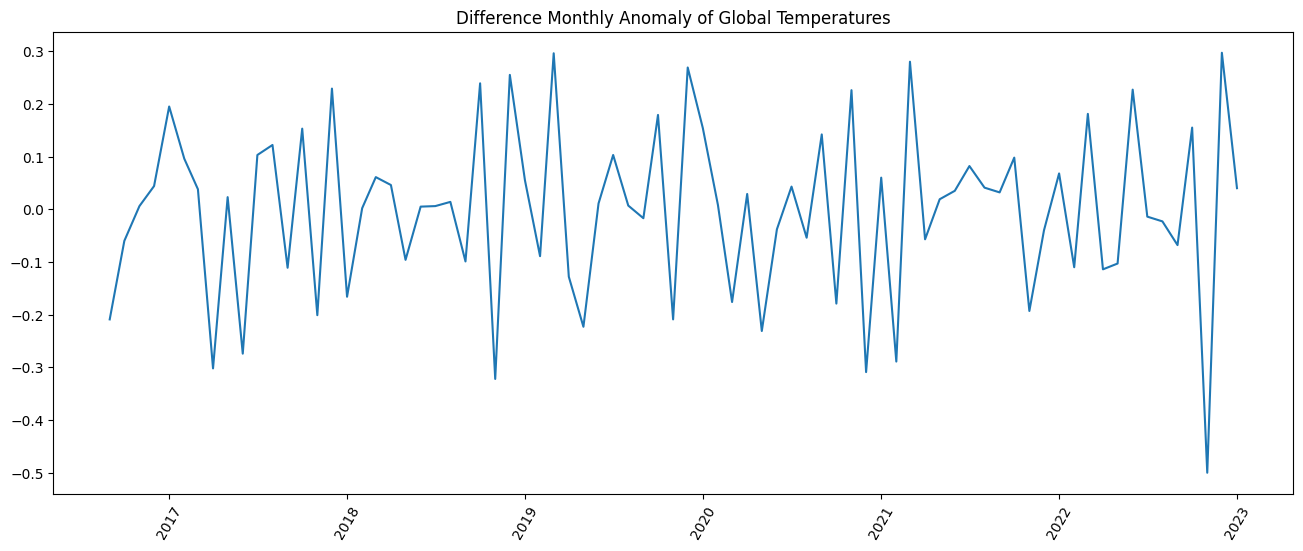

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(diff_data[2000:])
plt.title('Difference Monthly Anomaly of Global Temperatures')
plt.xticks(rotation=60)
plt.show()

In [ ]:
#Calcula a diferença sazonal de uma serie temporal
#Muito usado para o ARIMA para tornar a serie mais estacionario
seasonal_diff = diff_data.diff(12)

In [ ]:
seasonal_diff

,MonthlyAnomaly
Date,
1850-01-01,NaN
1850-02-01,NaN
1850-03-01,NaN
1850-04-01,NaN
1850-05-01,NaN
...,...
2022-09-01,-0.100
2022-10-01,0.057
2022-11-01,-0.307


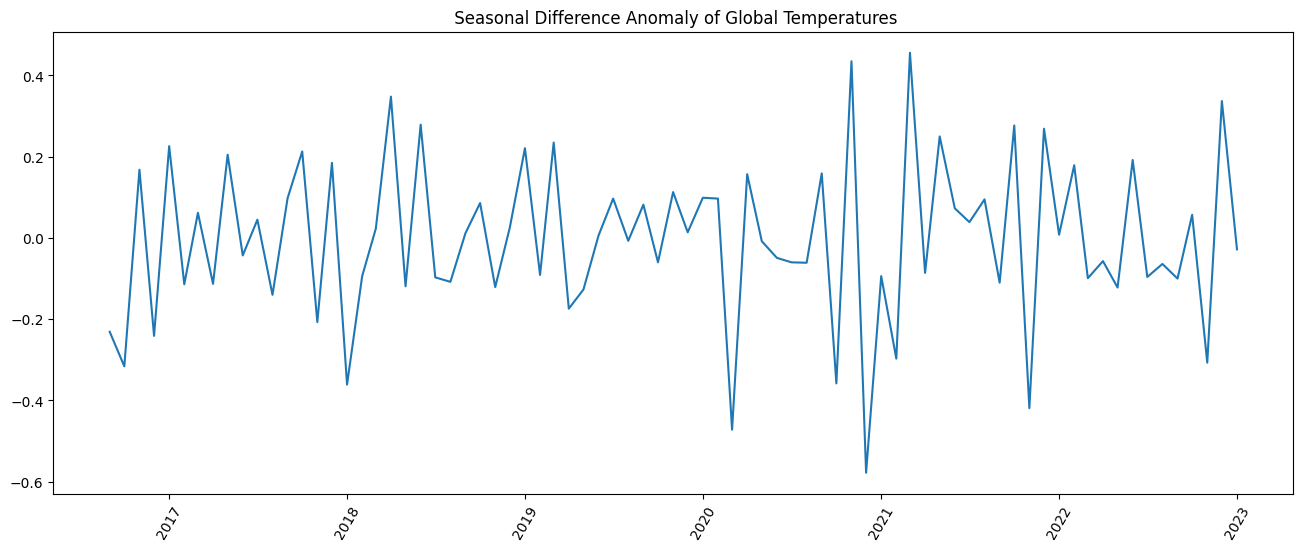

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(seasonal_diff[2000:])
plt.title(' Seasonal Difference Anomaly of Global Temperatures')
plt.xticks(rotation=60)
plt.show()

### Choosing the appropriate seaona differentation order

The appropriate differencing order depends on factors specific to your time series data, such as:

- Trend: How strong is the trend? First-order differencing will be sufficient to remove it.
- Seasonality: Do the data exhibit seasonal patterns? Second-order differencing will be necessary to do this.
- Noise: How much noise is present in the data? Higher orders of differencing can amplify the noise.

## Internal structures of time series

Now let us look at the following special features of time series data that require their special mathematical treatment:

- General trend
- Seasonality
- Cyclical movements
- Unexpected variations

Most time series have one or more of the internal structures mentioned above. Based on this notion, a time series can be expressed as xt = ft + st + ct + et, which is a sum of the trend, seasonal, cyclical and irregular components in that order. Here, t is the time index at which observations on the series were made at t = 1,2,3...N successive and equally spaced points in time.

The goal of time series analysis is to decompose a time series into its constituent features and develop mathematical models for each. These models are then used to understand what causes the observed behavior of the time series and to forecast the series for future points in time.

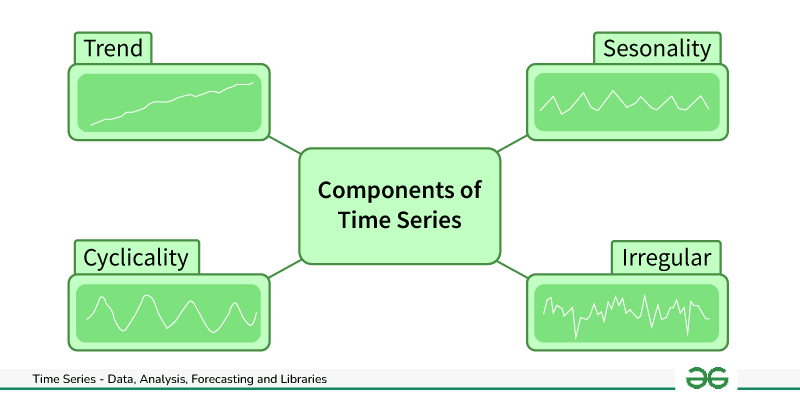

Trends show the general direction of data and whether it is increasing, decreasing, or remaining stationary over a long period of time. Trends indicate long-term movement in data and can reveal overall growth or decline. For example, e-commerce sales may show an upward trend over the past five years.

Seasonality refers to predictable patterns that repeat regularly, such as annual retail spikes during the holiday season. Seasonal components exhibit fixed fluctuations in time, direction, and magnitude. For example, electricity usage may increase each summer as people turn on their air conditioners.

Cycles demonstrate fluctuations that do not have a fixed period, such as economic expansions and recessions. These long-term patterns last more than a year and do not have consistent amplitudes or durations. Business cycles that oscillate between growth and decline are an example.

Finally, noise encompasses the residual variability in the data that the other components cannot explain. Noise includes unpredictable and erratic deviations after accounting for trends, seasonality, and cycles.

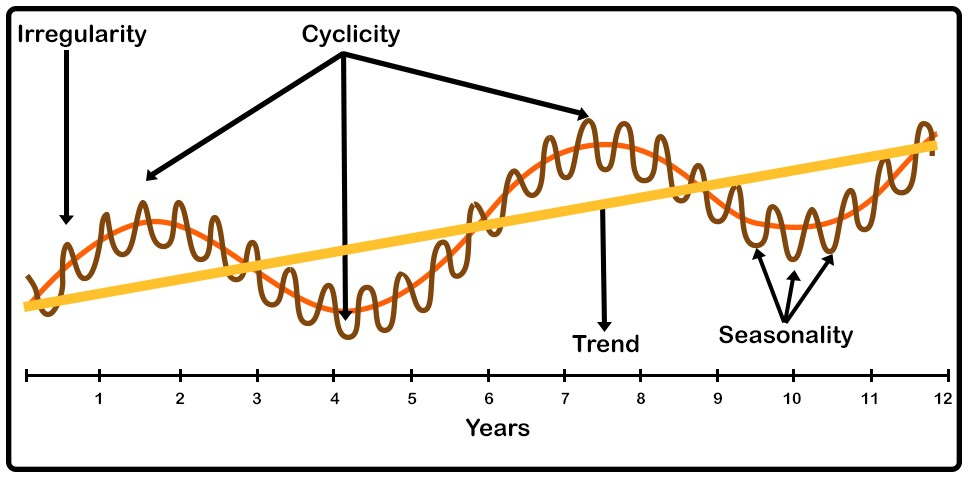

## Models for time series analysis

The purpose of time series analysis is to develop a mathematical model that can explain the observed behavior of a time series and possibly predict the future state of the series. The chosen model should be able to explain one or more of the internal structures that may be present. Therefore, we will give an overview of the following general models that are often used as building blocks of time series analysis:

- Zero mean models
- Random walk
- Trend models
- Seasonality models

### Zero mean models

Zero-mean models have a constant mean and constant variance and do not show predictable trends or seasonality. Observations from a zero-mean model are assumed to be independent and identically distributed (iid) and represent random noise around a fixed mean, which has been inferred from the time series as a constant term.

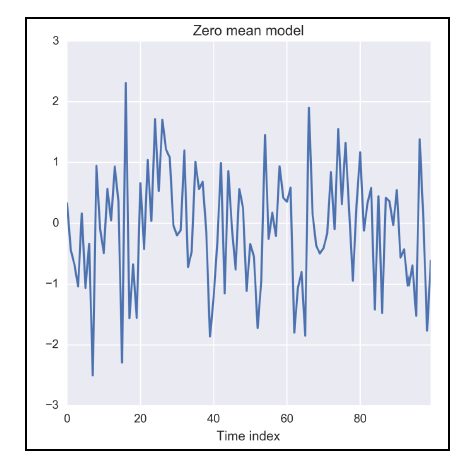

### Random walk

A random walk is given as a sum of n iids, which have zero mean and constant variance. Based on this definition, the performance of a random walk at time index t is given by the sum S = x1 + x2 + ... + xn. Random walk is important because if such behavior is found in a time series, it can be easily reduced to a zero mean model by taking differences of the observations from two consecutive time indices as St - St-1 = xt is an iid with zero mean and constant variance.

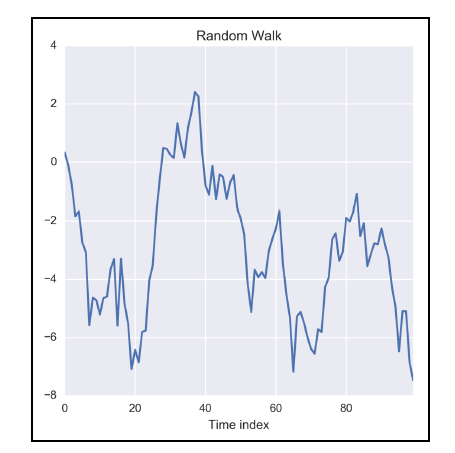

### Trend models

This type of model aims to capture the long-term trend in the time series which can be fitted as linear regression of the time index. When the time series does not exhibit any periodic or seasonal fluctuations, it can be expressed as just the sum of the trend and the zero-mean model as xt = μ(t) + yt, where μ(t) is the time-dependent long-term trend of the series.

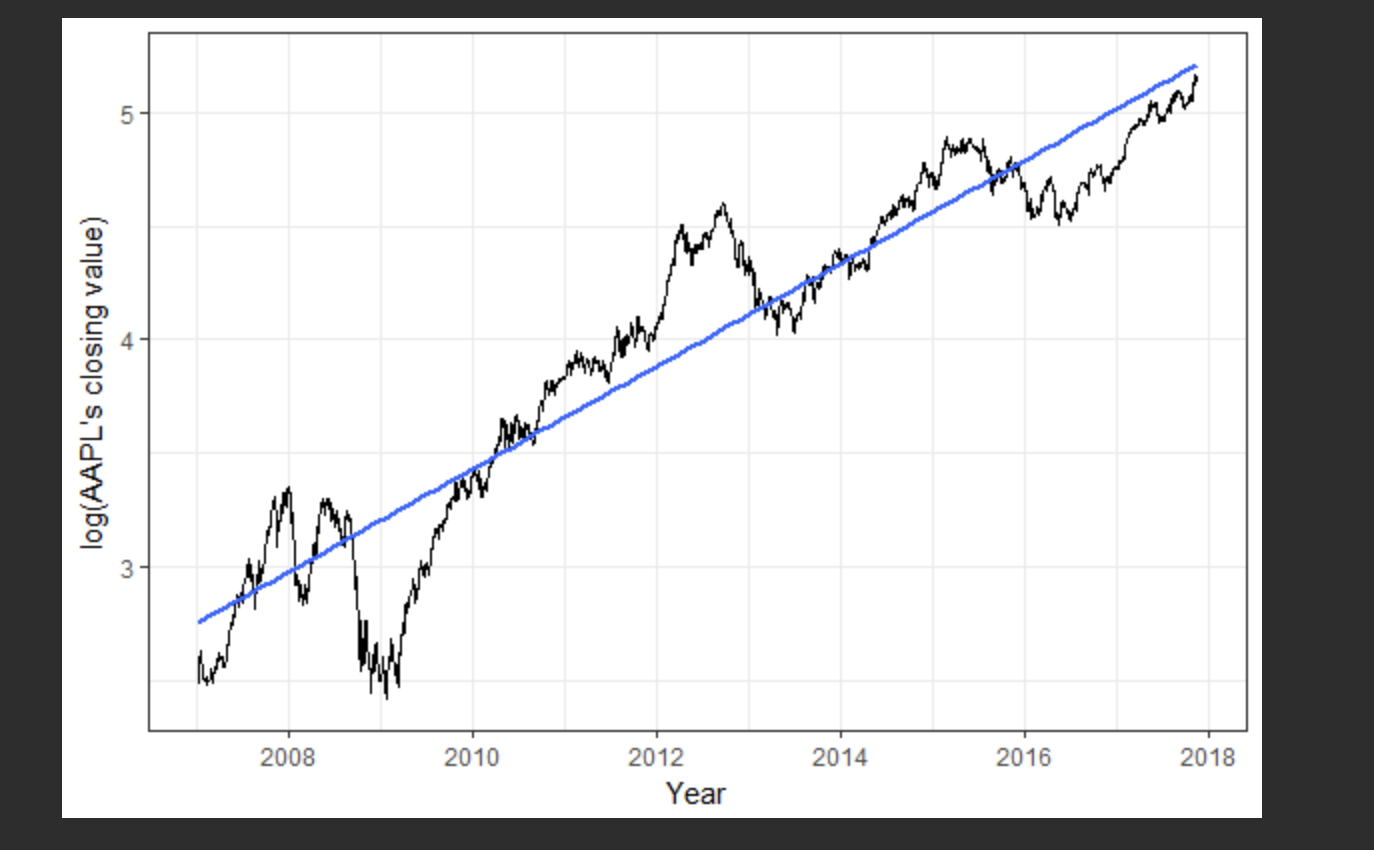

### Seasonality models

Seasonality manifests itself as periodic and repetitive fluctuations in a time series and is therefore modeled as a sum of weighted summation of sine waves of known periodicity. Seasonality models are also known as harmonic regression models, as they attempt to fit the summation of multiple sine waves.

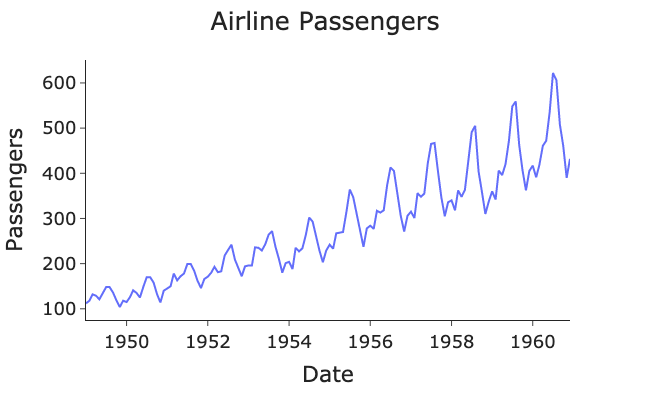

## Autocorrelation and partial autocorrelation

Autocorrelation is the correlation between two observations at different points in a time series. For example, values ​​separated by an interval may have a strong positive or negative correlation. When these correlations are present, they indicate that past values ​​influence the current value. Analysts use the autocorrelation and partial autocorrelation functions to understand the properties of time series data, fit appropriate models, and make predictions.

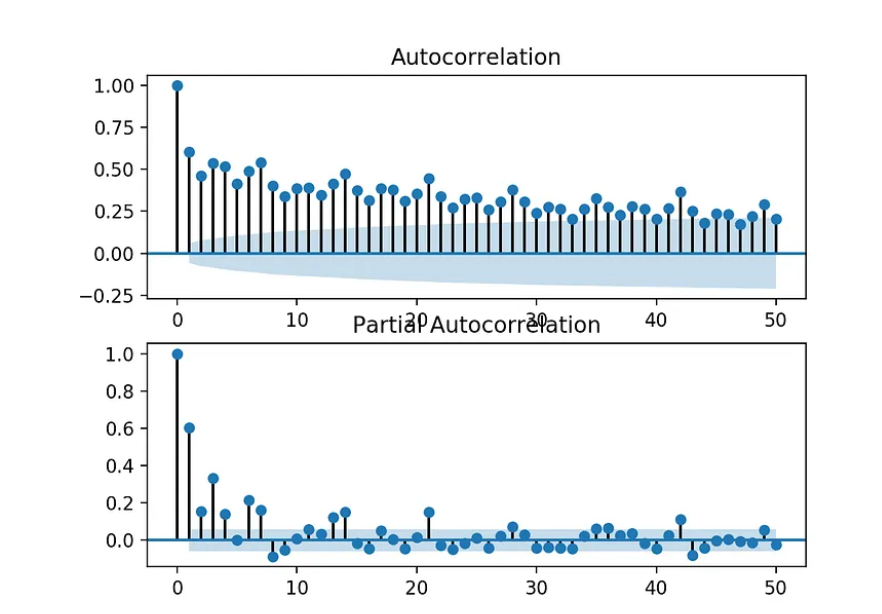

Autocorrelation is the correlation between two values ​​in a time series. In other words, the data in the time series correlate with each other—hence the name. We talk about these correlations using the term “lags.” Analysts record time series data by measuring a characteristic at evenly spaced intervals—such as daily, monthly, or yearly. The number of intervals between the two observations is the lag. For example, the lag between the current observation and the previous one is one. If you go back one more interval, the lag is two, and so on.

In mathematical terms, the observations in yt and yt–k are separated by k time units. K is the lag. This lag can be days, quarters, or years, depending on the nature of the data. When k=1, you are evaluating adjacent observations. For each lag, there is a correlation.

In [ ]:
path = '/content/drive/MyDrive/Geoscience/Alvaro/Aula6/data_et0.csv'
data = pd.read_csv(path)
data

,Year,Month,Date,ET0_mm,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1990,1,1990-02-01,229.1,NaN,NaN,NaN
1,1990,2,1990-03-04,155.9,NaN,NaN,NaN
2,1990,3,1990-04-04,167.9,NaN,NaN,NaN
3,1990,4,1990-05-05,81.3,NaN,NaN,NaN
4,1990,5,1990-06-05,40.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...
367,2020,8,2020-09-05,51.4,NaN,NaN,NaN
368,2020,9,2020-10-06,80.8,NaN,NaN,NaN
369,2020,10,2020-11-06,137.4,NaN,NaN,NaN
370,2020,11,2020-12-07,213.4,NaN,NaN,NaN


In [ ]:
data = data.drop(columns=['Year', 'Month', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'])

## Autocorrelation Function (ACF)

The autocorrelation function (ACF) plots the correlation coefficient against the lag, and is a visual representation of autocorrelation.

For example, the ACF at lag 3 is calculated as the correlation between the time series (Yt) and the same time series lagged by 3 time periods (Yt-3). In this way, the correlation is estimated at each lag and plotted on a graph that shows the correlation coefficient at each lag.

The correlation coefficient is measured by the Pearson correlation coefficient or the Spearman rank correlation coefficient.

The correlation coefficient can range from -1 (a perfect negative relationship) to +1 (a perfect positive relationship). A coefficient of 0 means that there is no relationship between the variables.

The autocorrelation function starts at lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.


<Axes: >

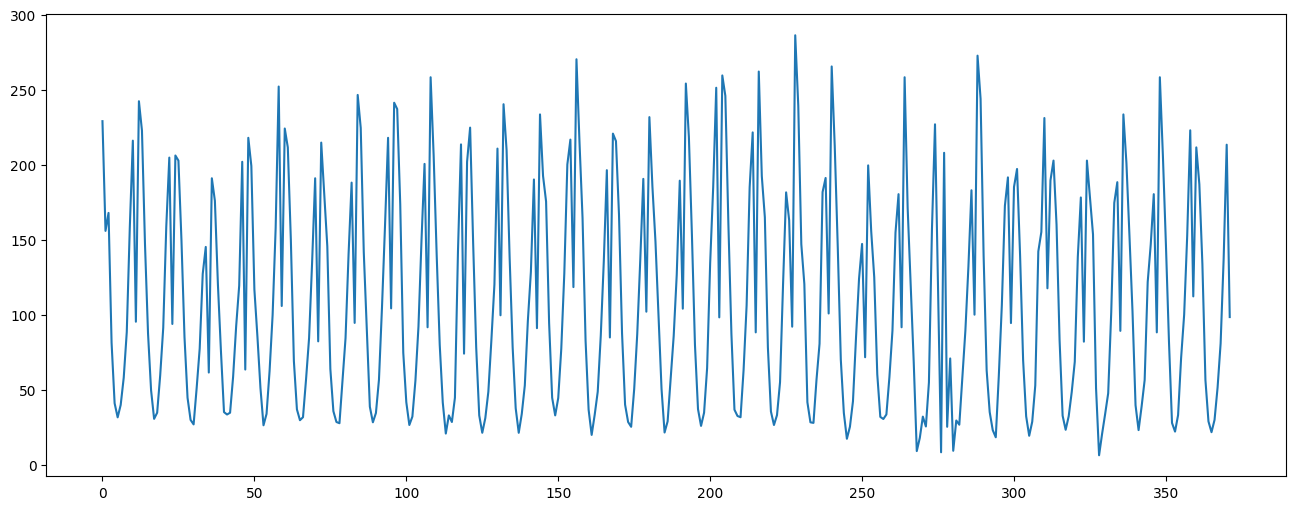

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(16,6))
data['ET0_mm'].plot()


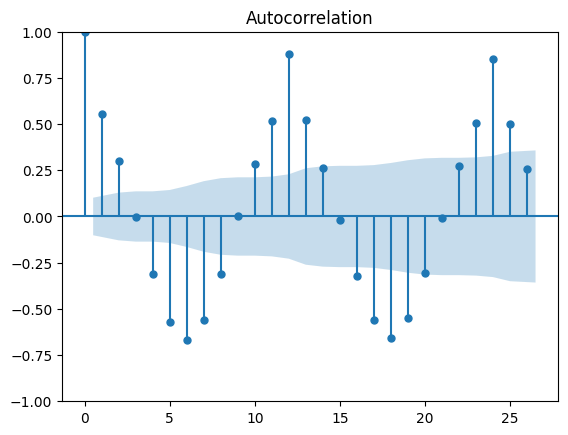

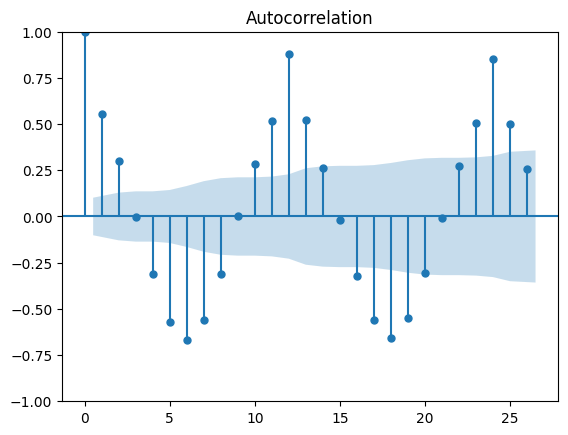

In [ ]:
plot_acf(data['ET0_mm'])

## Importance of ACF and PACF

The ACF and PACF plots are used to find out the order of the AR and MA components of an ARIMA model.

If the ACF plot is declining and there are some significant lags in the PACF, it indicates that the process is AR (autoregressive). We can select the order p for the AR(p) model based on significant peaks in the PACF plot. The peaks that lie outside the blue boundary of the PACF plot tell us the order of the AR model.

If the PACF plot is declining and there are some significant lags in the ACF, it indicates that the process is MA (moving average). We can select the order q for the MA(q) model based on significant peaks in the ACF plot. The peaks that lie outside the blue boundary of the ACF plot tell us the order of the MA model.

The blue area in the ACF and PACF plots indicated a 95% confidence interval and is an indicator of the significance threshold. Anything within the area is statistically close to zero and anything outside is statistically different from zero.

To determine the order of the model, we have to consider the peaks that are outside the significance limit (blue area).

# Time series decomposition

Time series data consists of observations made at consecutive points in time. This data can often be decomposed into multiple components to better understand the underlying patterns and trends. Time series decomposition is the process of separating a time series into its constituent components, such as trend, seasonality, and noise. In this article, we will explore various time series decomposition techniques, their types, and provide code samples for each.


Time series decomposition helps us divide a time series dataset into three main components:

- Trend: The trend component represents the long-term movement in the data, representing the underlying pattern.

- Seasonality: The seasonality component represents the repeated short-term fluctuations caused by factors such as seasons or cycles.

- Residual (noise): The residual component represents the random variability that remains after the trend and seasonality are removed.

By separating these components, we can gain insights into the behavior of the data and make better predictions.

## Types of time series decomposition

### Additive Decomposition:
In additive decomposition, the time series is expressed as the sum of its components: Y(t) = Trend(t) + Seasonal(t) + Residual(t)

It is suitable when the magnitude of seasonality does not vary with the magnitude of the time series.

### Multiplicative decomposition:
In multiplicative decomposition, the time series is expressed as the product of its components: Y(t) = Trend(t) * Seasonal(t) * Residual(t)

It is suitable when the magnitude of seasonality scales with the magnitude of the time series.

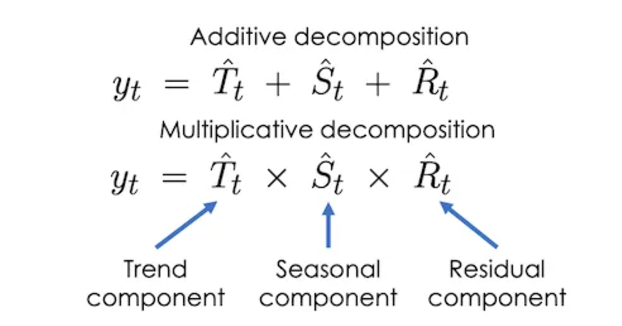


But why would you decompose a time series? Time series decomposition is used in time series analysis for tasks such as:

- exploratory data analysis (e.g., did unemployment increase this quarter after adjusting for seasonality?);
- preprocessing time series to identify and impute outliers and missing data;
- extracting features from time series for later use in classification, regression, and forecasting tasks;
- building forecasts (e.g., components can be forecasted separately and then aggregated to produce the final forecast).

In [ ]:
import ee
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
ee.Authenticate()
ee.Initialize(project = 'smart-oasis-466614-s5')

In [ ]:
#Vamos selecionar a area e a data
amazonia_roi = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017').filter(ee.Filter.eq('country_na', 'Brazil'))
date_start = '2022-01-01'
date_end = '2022-05-01'

In [ ]:
#Vamos pegar os spots de fotgo do FIRMS:
#FIRMS stands for Fire Information for Resource Management System. It provides near real-time fire data from satellite observations.
firms = ee.ImageCollection('FIRMS').filterDate(date_start, date_end).filterBounds(amazonia_roi)
firms = firms.select(['T21'])
# Calculate mean for the selected bands within the point region
def reduce_region_function(image):
  reduced_data = image.reduceRegion(reducer = ee.Reducer.count(), geometry = amazonia_roi, scale = 1000)
  return image.set(reduced_data).set('system:time_start', image.get('system:time_start'))

firms = firms.map(reduce_region_function)

In [ ]:
firms_count = np.array(firms.aggregate_array('T21').getInfo())

In [ ]:
#Vamos converter os dados em um dataframe
dates = np.array(firms.aggregate_array('system:time_start').getInfo())
day = [datetime.datetime.fromtimestamp(i/1000).strftime('%Y-%m-%d') for i in (dates)]

In [ ]:
firms_df = pd.DataFrame(firms_count, index= day, columns = ['Fires'])

In [ ]:
firms_df['Fires'] = firms_df['Fires'].astype(int)

In [ ]:
firms_df

,Fires
2022-01-01,337
2022-01-02,994
2022-01-03,663
2022-01-04,956
2022-01-05,940
...,...
2022-04-26,2250
2022-04-27,1842
2022-04-28,2197
2022-04-29,2233


In [ ]:
firms_df.index = pd.to_datetime(firms_df.index)

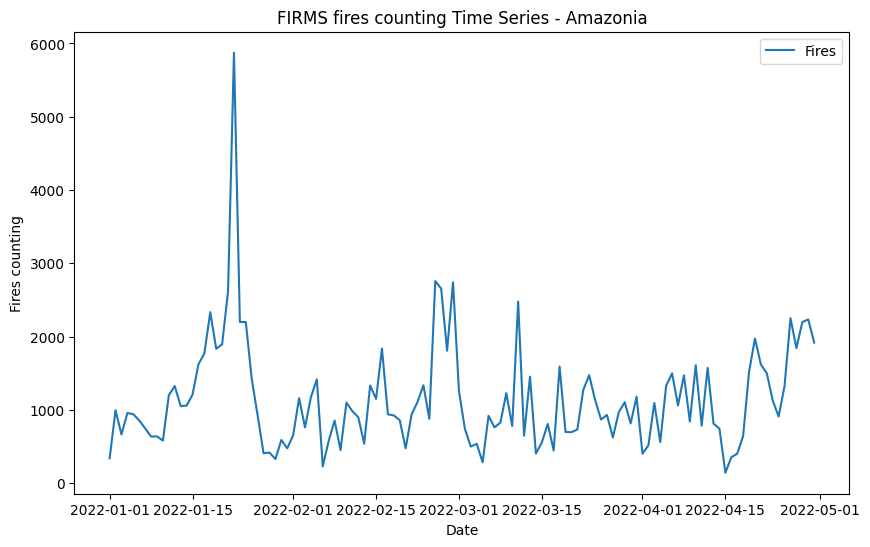

In [ ]:
#analizando serie temporal

plt.figure(figsize=(10, 6))
plt.plot(firms_df.index, firms_df['Fires'], label='Fires')
plt.xlabel('Date')
plt.ylabel('Fires counting')
plt.title('FIRMS fires counting Time Series - Amazonia')
plt.legend()
plt.show()

Let's apply the stationarity test:

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
adf_test(firms_df['Fires'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.031300
p-value                          0.001255
#Lags Used                       1.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


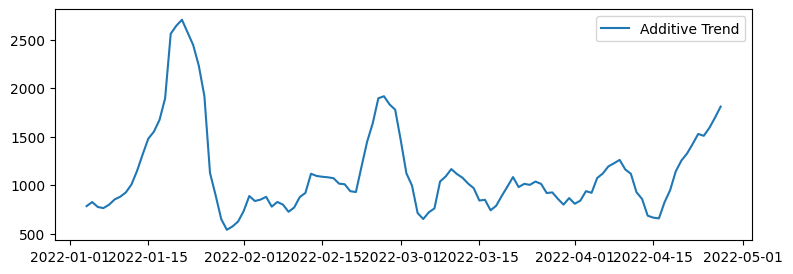

In [ ]:
#Depois de checar a estacionariedade da serie, vamos decompor em uma serie temporal

from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(firms_df['Fires'], model = 'additive')
plt.figure(figsize = (9, 3))
plt.plot(result_add.trend, label='Additive Trend')
plt.legend()

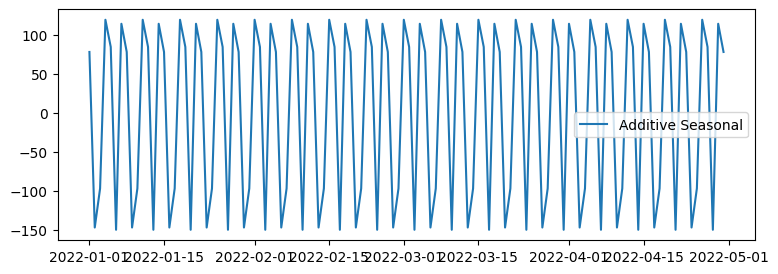

In [ ]:
plt.figure(figsize=(9, 3))

plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.legend()

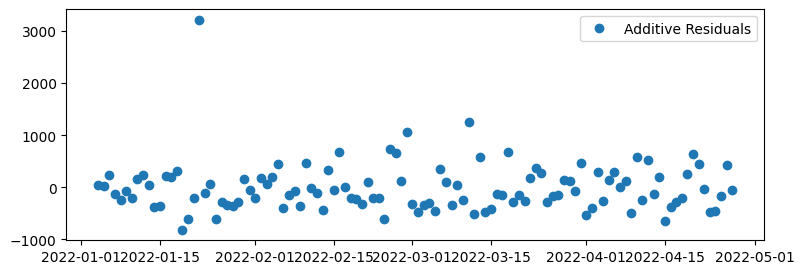

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(result_add.resid, label='Additive Residuals', marker='o', linestyle='None')
plt.legend()
plt.show()

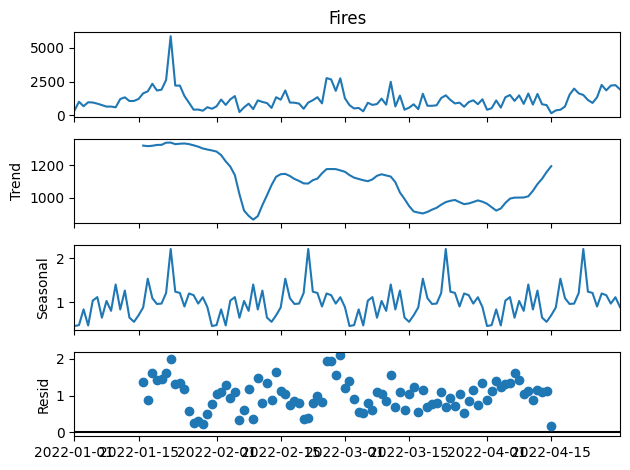

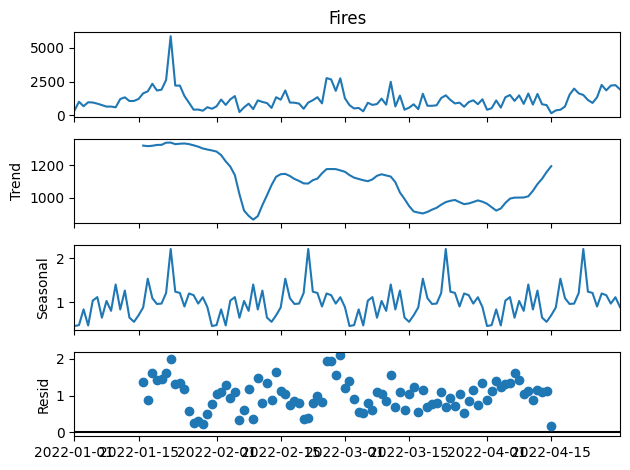

In [ ]:
#Podmos vizualizar todas as figuras em uma unica figura
decompose_model = seasonal_decompose(firms_df['Fires'], model = 'multiplicative',period = 30)
decompose_model.plot()

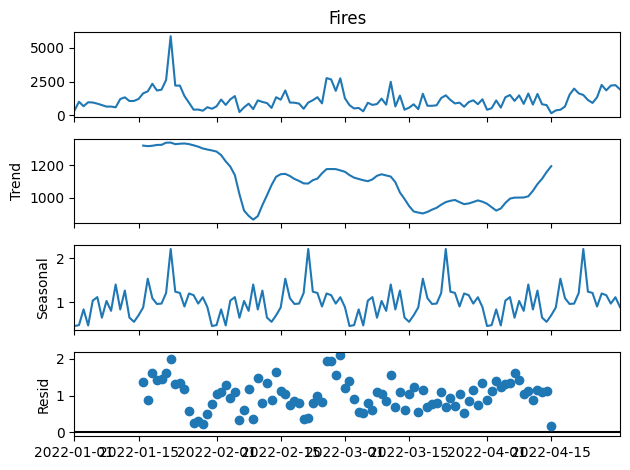

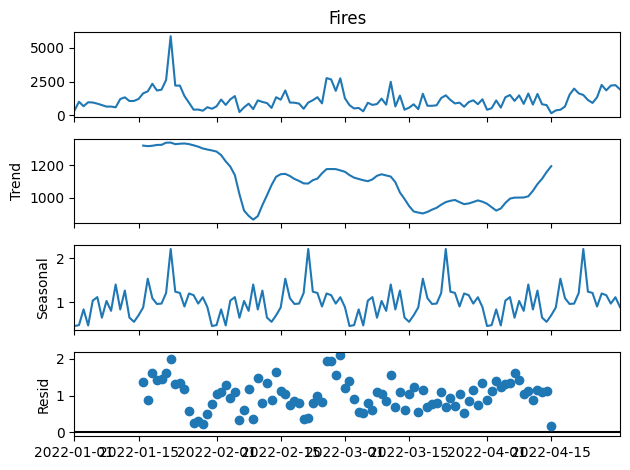

In [ ]:
decompose_model.plot()

### Time series decoposition with LOESS

o objetivo do STL é extrair um único componente sazonal, um componente de tendencia, e um componente residual de uma serie temporal. Ela faz isso aplicando Loess para multiplas transformaçoes da serie temporal original e extraindo recursivamente a tendencia e componente sazional.

STL calcula a componente sazional usando Loess. Portando, esses sao parametros para o tamanho da janela e do grau polinomial associado a componente sazional. O resumo dos parametros das sazionalidade STL sao, portanto:

- period: The period of the seasonal component we want STL to extract (e.g. period=12 if we want annual seasonality and the data frequency is monthly);
- seasonal: The Loess window size used to extract the seasonal component in STL (this determines how smooth and regular the extracted seasonal component is);
- seasonal_deg: The polynomial degree used by Loess to extract the seasonal component in STL (typically set to 0 or 1).

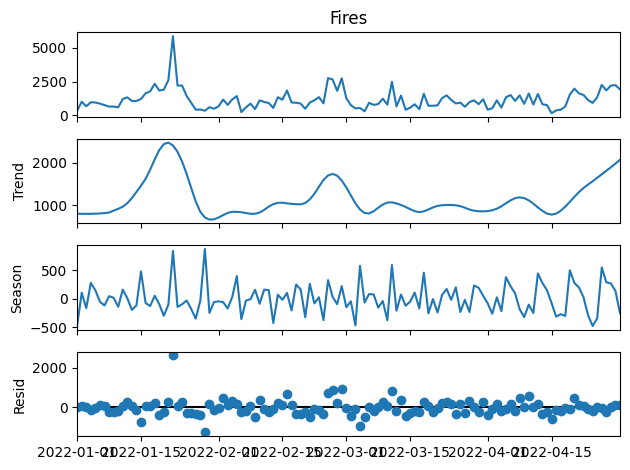

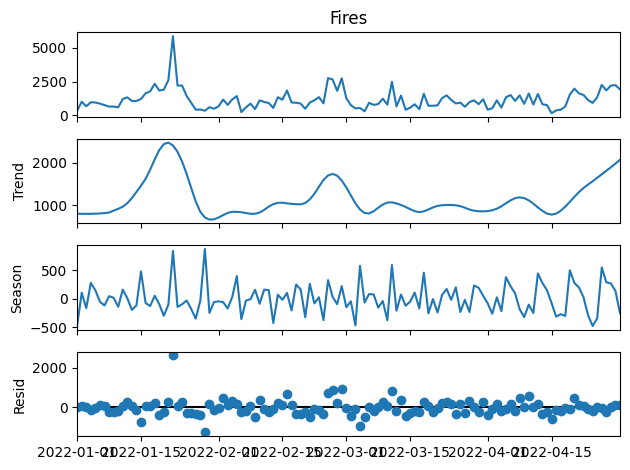

In [ ]:
from statsmodels.tsa.seasonal import STL

stl_decomposition = STL(firms_df['Fires']).fit()
stl_decomposition.plot()

Interpretando o gráfico
-> Esse grafico mostra a decomposição de uma serie temporal relacionadas a incendios ('Fires'). Ele foi dividido em tres componentes principai : tendencia(Trend), sazionalidade(season) e Resid(residuo).

O que significa cada coisa ?

**Tendencia (trend) :** É o comportamento de longo prazo. Mostra se, com o passar do tempo, os valores estao :

- Subindo: Tendencia alta

- Descendo : Tendencia de queda

- Estável : Sem tendecia clara

Exemplo simples : Se voce acompanha os incendios mes a mes e percebe que eles AUMENTAM AO LONGO DOS ANOS, isso é uma TENDENCIA ALTA.

No Gráfico : A curva de tendencia está suavizada e mostra os picos gerais, eliminando flutuaçoes de curto prazo


**Sazonalidade (Seasonal) :** É um padrão que acontece em ciclos regulares. Pode ser diário, semanal ou mensal.

Exemplo simples : Se sempre no inicio do mes ocorrem mais incendios, ou sempre aos finais de semana. Isso é uma sazionalidade

No gráfico : A linha de sazionalidade mostra as oscilações repetitivas - mesmo que pequenas;


**Residuo (Residual ou Noise) :** É o que sobra depois de retirar a tendencia e sazionalidade. Representa os eventos imprevisiveis, ruidos e erros.

Exemplo simples : Se num dia comum ocorre um pico de incendios sem explicação clara( nao é sazional nem segue a tendencia), isso vai para o resíduo

No gráfico : Os pontos da parte 'resid' mostram essas variações nao explicadas - o que é normal do esperado.




**Fazendo a análise do gráfico :**

Grafico superior - Serie Orignial('Fires') :
  Essa é a série original de dados de incendios ao longo do tempo;
  Vamos picos de incendios em determinados periodos (como em meados de janeiro e final de fevereiro);
  Eixos X : data (de janeiro a abril de 2022), Eixo y: número de incendios

Trend(tendencia):
  Mostra o comportamento de longo prazo, suavizado ruindos;
  Podemos ver dois grandes picos de tendencia no meio de janeiro e no final de fevereiro;
  Isso indica que houve periodos em que os incendios aumentaram constatimente

Season(sazionalidade) : Representa padores cíclicos repetitivos(diários, semanais, anuais, etc)
  A oscilação mostra que há alguma varia~çao repetitiva nos incendios ao longo do tempo, embora nao pareça uma sazionalidade muito forte ou regular

Resid( Residuo) : Sao os erros ou ruidos ; o que sobra da serie original depois de remover a tendecia e a sazionalidade;
  Idealmente, o residuo deve parecer ruido aletorio (sem padrao definido), como acontece aqui
  Se houvesse padroes nos residuos, isso indicaria que o modelo de decompsição nao caturou completamente a estrutura da serie

Time series decomposition is a powerful technique for analyzing geospatial data because it allows you to separate out the different components that influence the observed variations over time, such as trend, seasonality, and noise. This approach makes it easier to identify underlying patterns, such as long-term changes in land use or seasonal variations in climate indices, that might otherwise be obscured in global analyses. In addition, decomposition allows you to address the inherent complexity of geospatial data, where local and regional variations can significantly impact results. This allows analysts to generate more accurate insights and make decisions based on specific aspects of each component.

Another advantage of decomposition is improved modeling and forecasting. By separating the components of a time series, predictive models can be adjusted more efficiently for each one, resulting in greater accuracy. For example, trend can be modeled with regression techniques, while seasonality can be treated with periodic models. This is especially useful in geospatial data applied to environmental, meteorological or economic studies, where spatial and temporal interactions play a critical role. Thus, decomposition not only facilitates data interpretation but also improves the performance of future analyses.